
# PROJECT: Exploring cryptocurrency investments


In [1]:
# installing the crypto module:
!pip install Historic-Crypto

# library source
# https://pypi.org/project/Historic-Crypto/


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# the crypto functions
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies

# other stuff
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Import and average data from one coin

In [3]:
# Check the available assets
Cryptocurrencies().find_crypto_pairs()

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,FIL-EUR,FIL/EUR,False,0.03000000,online
1,CRO-USDT,CRO/USDT,False,0.03000000,online
2,FIDA-EUR,FIDA/EUR,False,0.03000000,online
3,ZEN-BTC,ZEN/BTC,False,0.03000000,online
4,WLUNA-USDT,WLUNA/USDT,False,0.10000000,delisted
...,...,...,...,...,...
581,FX-USD,FX/USD,False,0.03000000,online
582,ENS-EUR,ENS/EUR,False,0.03000000,online
583,GRT-BTC,GRT/BTC,False,0.03000000,online
584,KSM-USD,KSM/USD,False,0.03000000,online


In [4]:
# import data for ethereum

# inputs to HistoricalData: coin, time segment in seconds, start-date (YYYY-MM-DD-HH-MM), end-date

eth = HistoricalData('ETH-EUR',60*60*24,'2021-01-01-00-00','2022-12-01-00-00').retrieve_data()
eth

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2021-01-01T00:00:00
Provisional End: 2021-10-28T00:00:00
Data for chunk 1 of 3 extracted


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-10-28T00:00:00
Provisional End: 2022-08-24T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2022-08-24T00:00:00
Provisional End: 2023-06-20T00:00:00
Data for chunk 3 of 3 extracted


,low,high,open,close,volume
time,,,,,
2021-01-02,557.30,639.75,598.48,623.20,69697.273446
2021-01-03,613.08,785.00,623.99,759.24,120260.804391
2021-01-04,690.02,894.00,759.25,849.49,169908.700354
2021-01-05,795.08,923.64,849.00,896.35,109073.399025
2021-01-06,861.50,986.15,896.74,980.88,92553.194165
...,...,...,...,...,...
2022-11-27,1146.42,1175.48,1158.42,1151.40,3312.222839
2022-11-28,1108.23,1155.00,1151.61,1127.99,8003.084341
2022-11-29,1118.61,1188.79,1128.34,1177.93,5308.801160


<AxesSubplot: xlabel='time'>

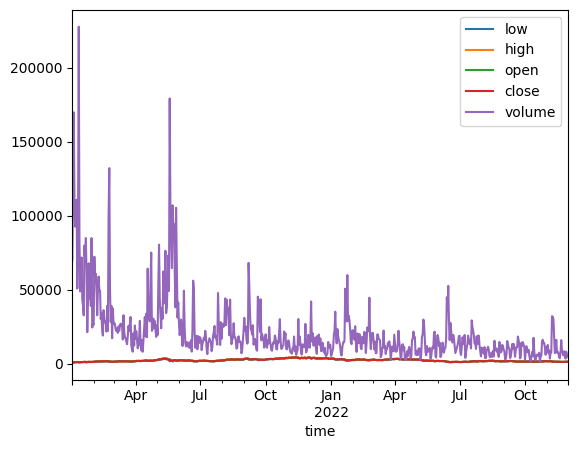

In [5]:
# Let's visualize some data
eth.plot.line()
# eth[['low','high','open','close']].plot.line()
# eth.plot.line(x='low',y='high',marker='o')

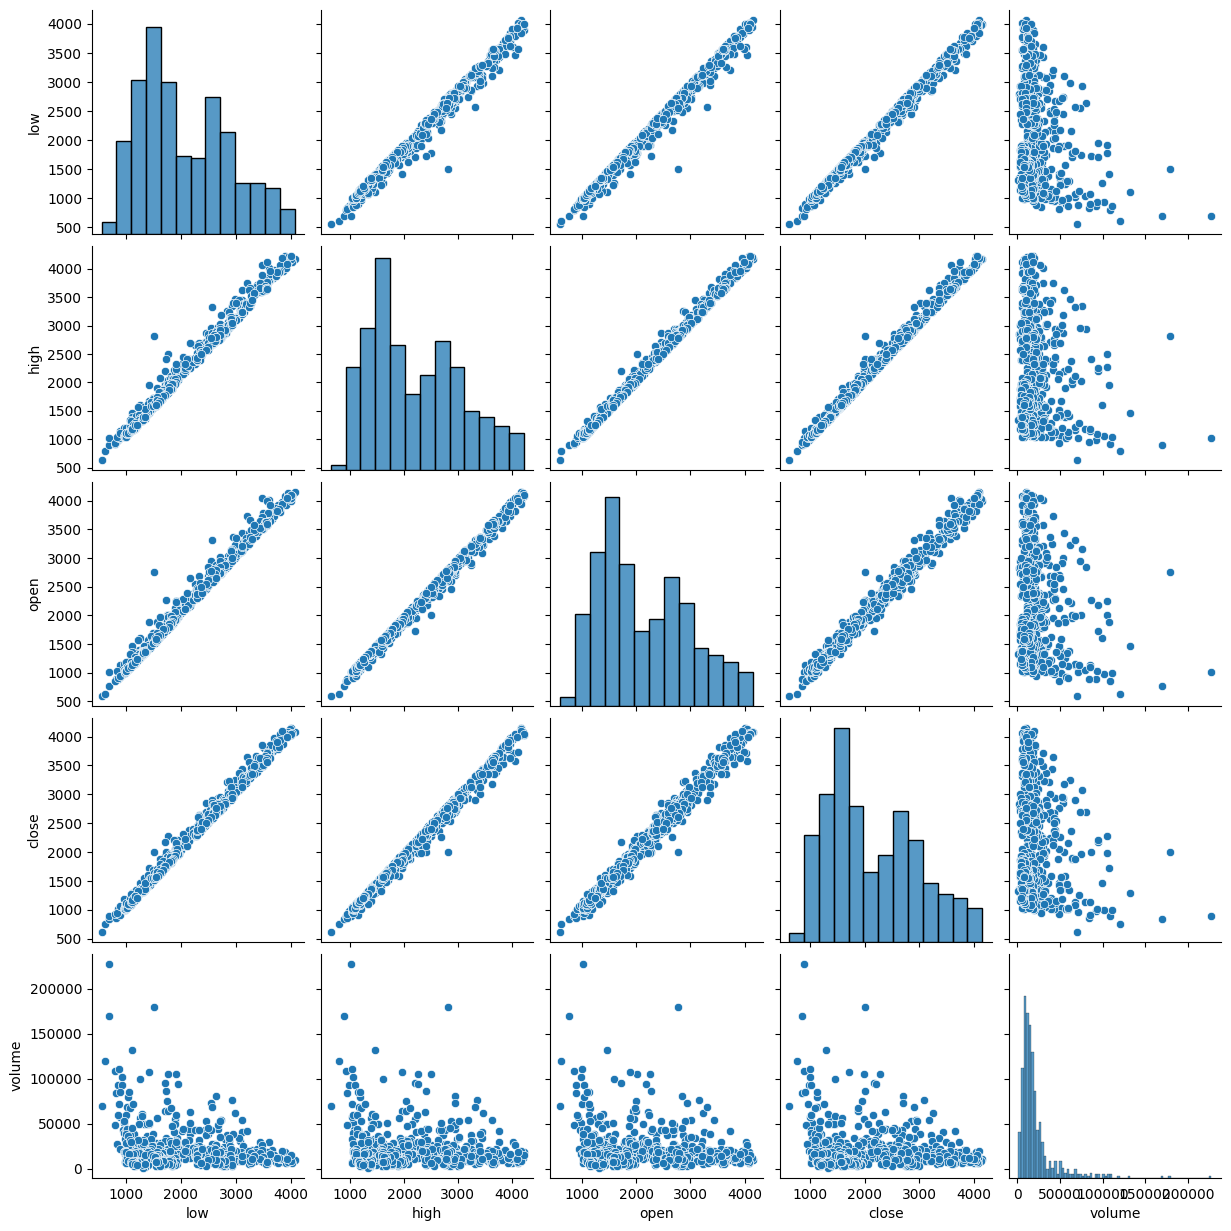

In [6]:
# plot all pairs of variables
sns.pairplot(eth);

In [7]:
# all price variables are really similar, so let's average them for convenience (also boosts SNR)
# So creating new column called price in table

eth['price'] = eth[['low','high','open','close']].mean(axis=1)
eth

,low,high,open,close,volume,price
time,,,,,,
2021-01-02,557.30,639.75,598.48,623.20,69697.273446,604.6825
2021-01-03,613.08,785.00,623.99,759.24,120260.804391,695.3275
2021-01-04,690.02,894.00,759.25,849.49,169908.700354,798.1900
2021-01-05,795.08,923.64,849.00,896.35,109073.399025,866.0175
2021-01-06,861.50,986.15,896.74,980.88,92553.194165,931.3175
...,...,...,...,...,...,...
2022-11-27,1146.42,1175.48,1158.42,1151.40,3312.222839,1157.9300
2022-11-28,1108.23,1155.00,1151.61,1127.99,8003.084341,1135.7075
2022-11-29,1118.61,1188.79,1128.34,1177.93,5308.801160,1153.4175


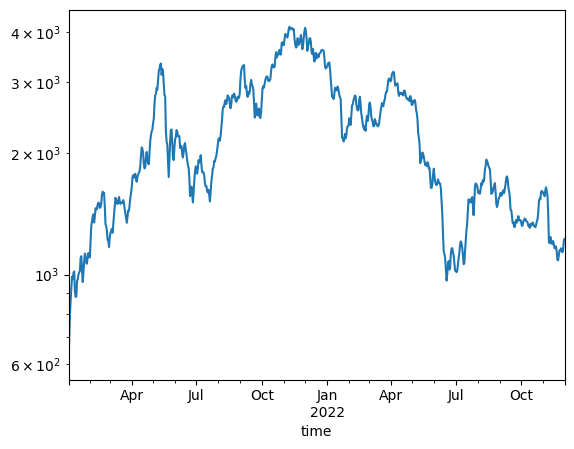

In [8]:
# ploting data into logarithmic scale

eth['price'].plot(logy=True);

# Create a dataframe of selected coins

In [9]:
# Show all available indexes
Cryptocurrencies().find_crypto_pairs()

# other possibilities
Cryptocurrencies().find_crypto_pairs()['id'].tolist()

# maybe a bit easier:
for item in Cryptocurrencies().find_crypto_pairs()['id'].tolist():
  print(item)

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
PLU-USD
WBTC-BTC
NKN-BTC
ORN-USD
AGLD-USD
DESO-USD
CRV-EUR
NKN-USD
TRAC-USDT
ETH-USD
COVAL-USD
1INCH-BTC
INDEX-USDT
FORTH-EUR
TRU-BTC
MSOL-USD
BTRST-USD
LOOM-USD
EOS-EUR
XLM-USDT
CGLD-GBP
ARPA-USDT
BAT-USD
IOTX-EUR
NMR-EUR
FIS-USD
BADGER-USDT
LRC-BTC
API3-USDT
CVC-USDC
FIL-GBP
AST-USD
FX-USD
CRO-USDT
GRT-BTC
GMT-USD
TIME-USD
METIS-USD
BNT-BTC
CHZ-EUR
FORT-USDT
CGLD-EUR
UNI-USD
KNC-BTC
AVAX-USD
ICP-GBP
ELA-USD
REN-USD
MIR-USD
REP-USD
QNT-USD
CRPT-USD
ASM-USD
LINK-ETH
MNDE-USD
ATOM-EUR
XYO-USD
1INCH-GBP
DREP-USDT
PRO-USD
BNT-GBP
LCX-USDT
ARPA-EUR
YFI-USD
NCT-EUR
ICP-USDT
RPL-USD
CVX-USD
FORTH-GBP
DDX-USDT
MATH-USD
WAMPL-USD
MIR-BTC
ANKR-BTC
GTC-USD
YFII-USD
ADA-BTC
ALCX-USD
AIOZ-USD
LINK-BTC
DREP-USD
WBTC-USD
ETC-EUR
DASH-USD
WL

In [10]:
# just print out the EUR ones

for item in Cryptocurrencies().find_crypto_pairs()['id'].tolist():
  if 'EUR' in item: print(item)

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
CRV-EUR
FORTH-EUR
EOS-EUR
IOTX-EUR
NMR-EUR
CHZ-EUR
CGLD-EUR
ATOM-EUR
ARPA-EUR
NCT-EUR
ETC-EUR
WLUNA-EUR
RNDR-EUR
ETH-EUR
WCFG-EUR
XTZ-EUR
ICP-EUR
ZRX-EUR
RAD-EUR
SHIB-EUR
BTC-EUR
ANKR-EUR
POWR-EUR
REQ-EUR
DOGE-EUR
AUCTION-EUR
KRL-EUR
EUROC-EUR
CLV-EUR
GALA-EUR
USDT-EUR
SUKU-EUR
MINA-EUR
DDX-EUR
XYO-EUR
LQTY-EUR
BAND-EUR
SOL-EUR
OMG-EUR
MANA-EUR
RLY-EUR
BAT-EUR
BNT-EUR
SHPING-EUR
MIR-EUR
NKN-EUR
BADGER-EUR
BICO-EUR
ALCX-EUR
USDC-EUR
TRAC-EUR
FIL-EUR
ENS-EUR
LINK-EUR
ADA-EUR
GRT-EUR
AVAX-EUR
XRP-EUR
LCX-EUR
MATIC-EUR
CRO-EUR
ALGO-EUR
LTC-EUR
EUROC-USD
XLM-EUR
TRU-EUR
ERN-EUR
DOT-EUR
BCH-EUR
PERP-EUR
NU-EUR
VGX-EUR
UST-EUR
CTX-EUR
MASK-EUR
1INCH-EUR
DIA-EUR
FIDA-EUR
UMA-EUR
SNX-EUR
SUSHI-EUR
UNI-EUR
AAVE-EUR
AXS-EUR
DESO-EUR
APE-EUR
SKL-EUR
BTRST-EUR


In [11]:
# picking only few 
coins2eval = ['BTC-EUR','ETH-EUR','XLM-EUR','ALGO-EUR','LINK-EUR']
# 'ADA-EUR','DOGE-EUR','MATIC-EUR' # no available data from January 2020...


# initializing a dictionary to store the data
coinpricesD = {}

# extracting the average price from each coin
for ticker in coins2eval:
  tmp = HistoricalData(ticker,60*60*24,'2020-01-01-00-00','2021-12-01-00-00',verbose=False).retrieve_data()
  coinpricesD[ticker] = tmp[['low','high','open','close']].mean(axis=1)

Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00


C:\Users\Atharv\AppData\Local\Programs\Python\Python310\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00


In [12]:
# checking out the dictionary...
coinpricesD

# ...then import to dataframe
coinprices = pd.DataFrame(coinpricesD)
coinprices

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,6308.8575,114.7475,0.039717,NaN,NaN
2020-01-03,6392.0275,116.7225,0.039859,NaN,NaN
2020-01-04,6577.2700,120.3050,0.040733,NaN,NaN
2020-01-05,6610.8125,121.7200,0.040897,NaN,NaN
2020-01-06,6770.9825,125.0450,0.043053,NaN,NaN
...,...,...,...,...,...
2021-11-27,48144.6975,3621.7500,0.290214,1.46295,21.444782
2021-11-28,49336.3000,3688.0850,0.282654,1.47900,21.357445
2021-11-29,51151.0100,3877.1150,0.290295,1.55515,22.163015


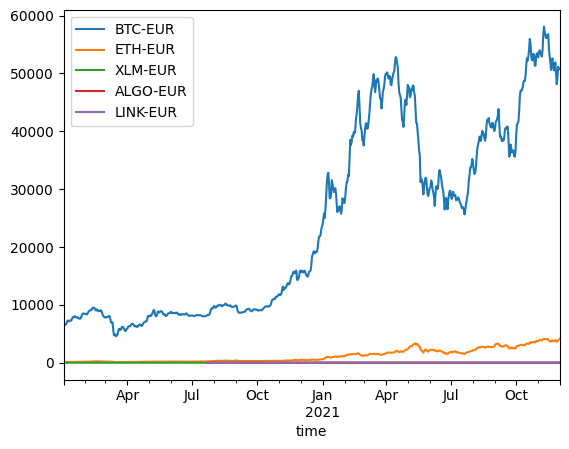

In [13]:
# plot
coinprices.plot();

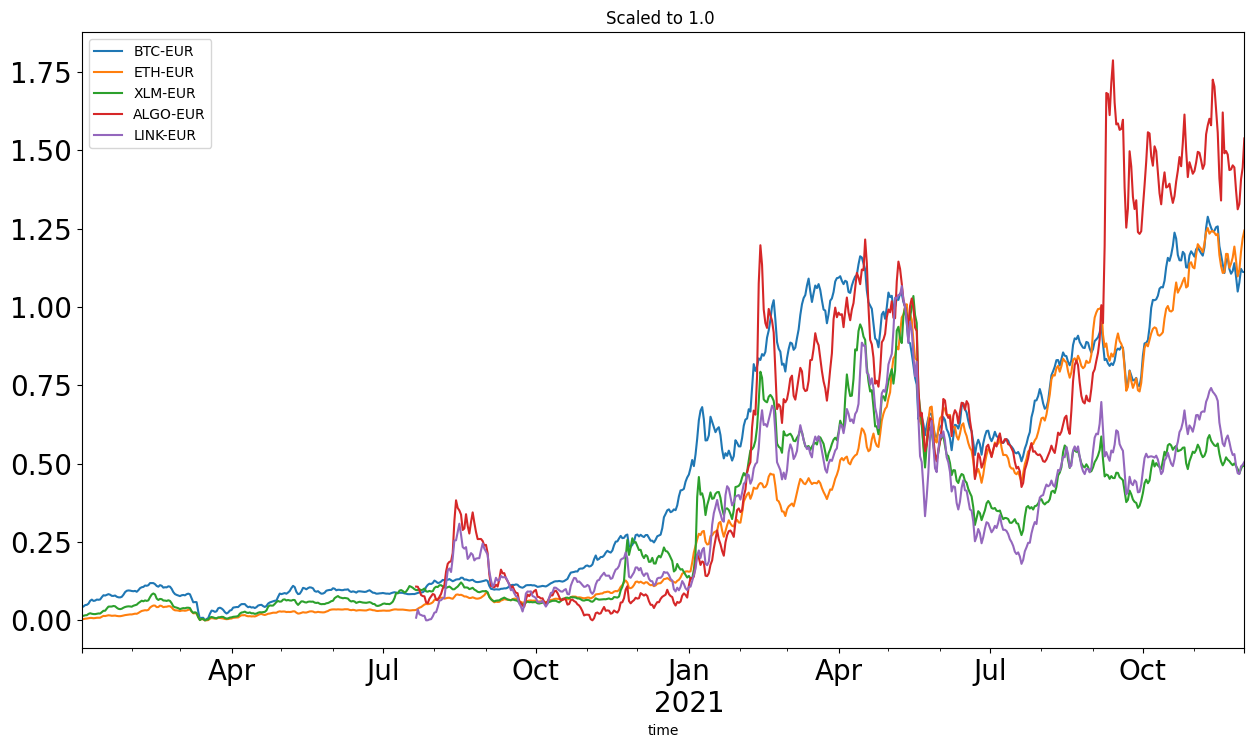

In [14]:
# scaling prices each column to a range of [0 1]
coinpricesScaled = (coinprices-coinprices.min()) / (coinprices.max()-coinprices.min())
coinpricesScaled = (coinprices-coinprices.min()) / (coinprices.loc['2021-05-11'].values[:]-coinprices.min())

# a simple plot
coinpricesScaled.plot(figsize=(15,8),
                      title='Scaled to 1.0 ',fontsize=20);

# Data dimensionality via PCA

In [15]:
# correlation matrix (same for original?)
coinpricesScaled.corr()

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.912027,0.922419,0.880745,0.882267
ETH-EUR,0.912027,1.000000,0.815103,0.902632,0.790730
XLM-EUR,0.922419,0.815103,1.000000,0.729552,0.946394
ALGO-EUR,0.880745,0.902632,0.729552,1.000000,0.807993
LINK-EUR,0.882267,0.790730,0.946394,0.807993,1.000000


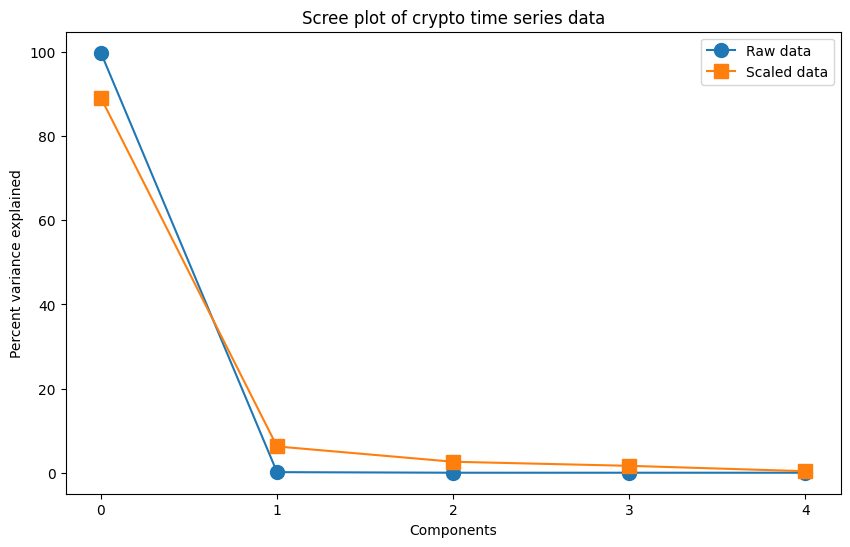

In [16]:
# PCA
pca = PCA()
pca.fit(coinprices.dropna()) #drops the rows which contains nan values
pcaS = PCA()
pcaS.fit(coinpricesScaled.dropna())


# plot the eigenspectra
plt.figure(figsize=(10,6))
plt.plot(100*pca.explained_variance_ratio_,'o-',markersize=10,label='Raw data')
plt.plot(100*pcaS.explained_variance_ratio_,'s-',markersize=10,label='Scaled data')

# make the plot look a bit nicer
plt.xticks(range(pca.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent variance explained')
plt.legend()
plt.title('Scree plot of crypto time series data')
plt.show()

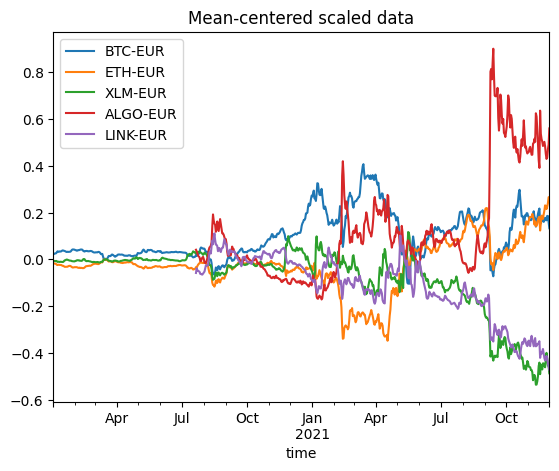

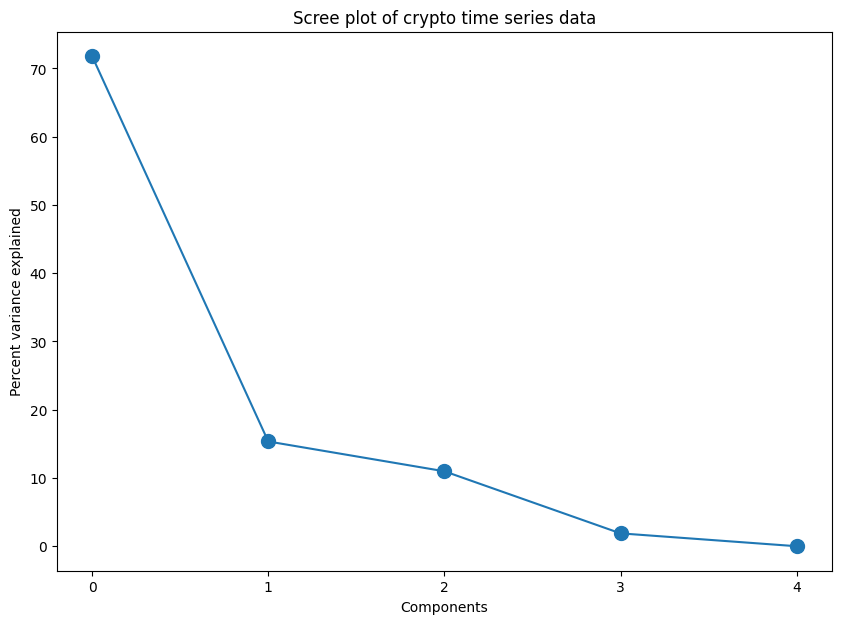

In [17]:
# try PCA again with mean-subtraction

coinpricesScaledCentered = coinpricesScaled.sub(coinpricesScaled.mean(axis=1),axis=0)

coinpricesScaledCentered.plot(title='Mean-centered scaled data');


# PCA
pca = PCA()
pca.fit(coinpricesScaledCentered.dropna())

# repeat the plot
plt.figure(figsize=(10,7))
plt.plot(100*pca.explained_variance_ratio_,'o-',markersize=10)
plt.xticks(range(pca.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent variance explained')
plt.title('Scree plot of crypto time series data')
plt.show()

# Simulating DCA investments

In [18]:
## Simulation 1: 10 euros per day


# how much to invest per time unit (day)
dailyInvest = 10

# which coin to simulate
whichCoin = 'ETH-EUR'


# initialize investment
euroInvest = 0
coinInvest = 0


# loop through days
for dayi in range(coinprices.shape[0]):
  
  #Finding how much crypto did we buy on this day?
  coin = dailyInvest / coinprices[whichCoin][dayi]

  # adding to totals
  euroInvest += dailyInvest
  coinInvest += coin

# converting from coin to euro
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

#results! \u20ac - unicode for euro symbol
print(f'Total euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print(f'End result: \u20ac{eurosAtEnd:,.2f}')

Total euro invested: €7,000.00
Total ETH purchased: 18.1505999
End result: €74,275.16


In [19]:
## Simulation 2:  7 euros when the price is HIGHER than the previous day
#                15 euros when the price is LOWER than the previous day

dailyInvestUp =  7
dailyInvestDn = 15


# which coin to simulate
whichCoin = 'ETH-EUR'


# initialize investment
euroInvest = 0
coinInvest = 0


# loop through days
# Simulating the price from 2nd day that's why we are taking 1  
for dayi in range(1,coinprices.shape[0]):
  
  # Checking is the coin up or down?
  if (coinprices[whichCoin][dayi] > coinprices[whichCoin][dayi-1]): # going up!
    coin = dailyInvestUp / coinprices[whichCoin][dayi]
    euroInvest += dailyInvestUp
  else: # going down!
    coin = dailyInvestDn / coinprices[whichCoin][dayi]
    euroInvest += dailyInvestDn

  # add to totals
  coinInvest += coin

# convert from coin to euro
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

# results!
print(f'Total euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print(f'End result: \u20ac{eurosAtEnd:,.2f}')

Total euro invested: €7,189.00
Total ETH purchased: 18.5982644
End result: €76,107.07


In [20]:
## Simulation 3: 10 euros per day when price goes up
#                10*prct-diff when price goes down

dailyInvest = 10

# which coin to simulate
whichCoin = 'ETH-EUR'


# initialize investment
euroInvest = 0
coinInvest = 0

# initializing the percent change (not necessary but allows for visualization/exploration)
pctchng = [0]*coinprices.shape[0]


# loop through days
for dayi in range(1,coinprices.shape[0]):
  
  # percent change from previous day
  pctchng[dayi] = 100*(coinprices[whichCoin][dayi] - coinprices[whichCoin][dayi-1]) / coinprices[whichCoin][dayi-1]


  # determining investment amount according to relative price
  if pctchng[dayi]<0: # lower than previous day
    toinvest = dailyInvest * -pctchng[dayi]
  else: # equal or higher than previous day
    toinvest = dailyInvest
    
  # now add to totals
  coin = toinvest / coinprices[whichCoin][dayi]
  euroInvest += toinvest
  coinInvest += coin

# convert from coin to euro
eurosAtEnd = coinInvest*coinprices[whichCoin][-1]

# print out the results!
print(f'Total euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} purchased: {coinInvest:.7f}')
print(f'End result: \u20ac{eurosAtEnd:,.2f}')

Total euro invested: €11,609.94
Total ETH purchased: 30.0428325
End result: €122,940.08


In [21]:
toinvest,dailyInvest

(10, 10)

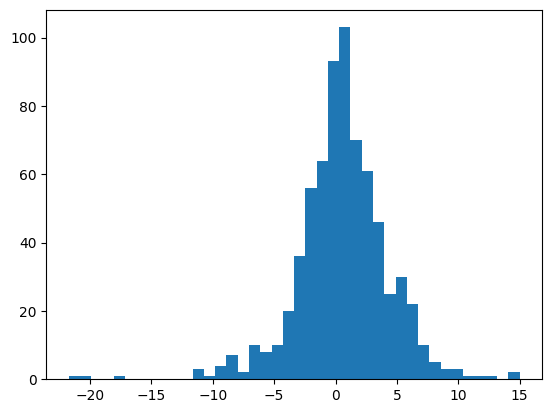

In [22]:
# histogram of percent changes
plt.hist(pctchng,bins=40);

# Which coin should you have bought?

In [23]:
# how much to invest per time unit (day)
dailyInvest = 10


# initializing dictionary of investments (coin:amount)
euroInvest = {}
coinInvest = {}


# loop through days
for dayi in range(coinprices.shape[0]):
  
  # loop over coins
  for coinname in coins2eval:
    
    #only initializing on day 1
    if dayi==0:
      euroInvest[coinname] = 0
      coinInvest[coinname] = 0

    # how much crypto did we buy on this day?
    coin = dailyInvest / coinprices[coinname][dayi]

    # skip this data point if no data
    if np.isnan(coin): continue

    # add to totals
    euroInvest[coinname] += dailyInvest
    coinInvest[coinname] += coin


# convert from coin to euro and print
for coinname in coins2eval:
  eurosAtEnd = coinInvest[coinname]*coinprices[coinname][-1]
  print(f'{coinname[:-4]:>4}: \u20ac{euroInvest[coinname]:,.2f} \u21e8 \u20ac{eurosAtEnd:>9,.2f}')

 BTC: €7,000.00 ⇨ €25,521.89
 ETH: €7,000.00 ⇨ €74,275.16
 XLM: €7,000.00 ⇨ €20,351.51
ALGO: €4,990.00 ⇨ €16,143.64
LINK: €4,990.00 ⇨ € 7,393.87
